In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import pandas as pd
import re

from functools import reduce

In [2]:
srcdir = f'{os.getcwd()}/pod2_step_experiment/raw/'
dstdir = f'{os.getcwd()}/pod2_step_experiment/'

In [3]:
def open_csv(filename):
    """ Read CSV files from Grafana """
    dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S%z')
    df0 = pd.read_csv(srcdir + filename,
        sep=';',
        parse_dates=['Time'],
        index_col='Time',
        date_parser=dateparse)
    df0 = df0.interpolate(method='linear', limit_direction='forward').resample('1min').last()
    df0 = df0.interpolate(method='linear', limit_direction='backward')
    return df0

In [4]:
os.listdir(srcdir)

['temperature_outlet_rack12.csv',
 'cooler_fan_signal01.csv',
 'cooler_fan_signal04.csv',
 'fan_rpm_rack07.csv',
 'sensor_strips_racks_01_to_03.csv',
 'temperature_outlet_rack08.csv',
 'power_rack07.csv',
 'temperature_outlet_rack02.csv',
 'temperature_inlet_rack01.csv',
 'sensor_strips_racks_10_to_12.csv',
 'cold_aisle_sensor_strip.csv',
 'power_rack09.csv',
 'temperature_inlet_rack10.csv',
 'cooler_fan_temperature01.csv',
 'fan_rpm_rack12.csv',
 'temperature_inlet_rack05.csv',
 'cooler_fan_temperature03.csv',
 'power_in_vs_out.csv',
 'fan_rpm_rack08.csv',
 'temperature_outlet_rack05.csv',
 'temperature_outlet_rack03.csv',
 'power_rack08.csv',
 'power_rack11.csv',
 'diff_pressure.csv',
 'temperature_inlet_rack02.csv',
 'fan_rpm_rack11.csv',
 'sensor_strips_racks_07_to_09.csv',
 'temperature_inlet_rack04.csv',
 'temperature_outlet_rack04.csv',
 'temperature_inlet_rack06.csv',
 'temperature_inlet_rack09.csv',
 'fan_rpm_rack04.csv',
 'fan_rpm_rack10.csv',
 'fan_rpm_rack01.csv',
 'fan_rpm

In [5]:
grafana_csvs = {}
for csv in os.listdir(srcdir):
    grafana_csvs[csv] = open_csv(csv)

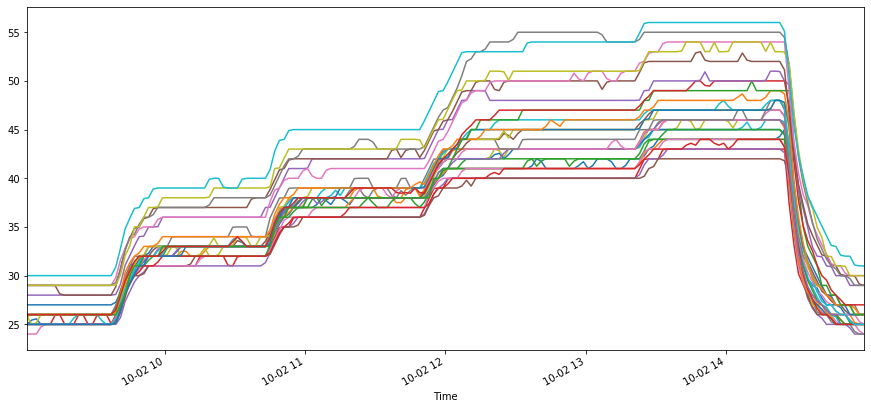

In [6]:
grafana_csvs['temperature_outlet_rack12.csv'].plot(figsize=(15, 7), legend=False)

In [7]:
for csv in grafana_csvs:
    df = grafana_csvs[csv]
    df.insert(loc=0, column='time', value=df.index.strftime('%d-%b-%Y %H:%M:%S'))

In [8]:
for csv in grafana_csvs:
    df = grafana_csvs[csv]
    df.to_csv(dstdir + csv, index=False, header=True)